# Exploring Available Database

In this notebook will be present the main data files of Salic (_Sistema de Apoio às Leis de Incentivo à Cultura_) that can be found in this repository.

In [1]:
# Import most used modules: numpy (np), pyplot (plt), pandas (pd)
%pylab inline
import pandas as pd
import datetime as dt

# Define useful directories
DATA_FOLDER = '../../data/raw/'

Populating the interactive namespace from numpy and matplotlib


---
### Main areas of cultural projects

In [2]:
areas = pd.read_csv(DATA_FOLDER + 'area.csv')
areas

,Codigo,Descricao,stEstado
0,1,Artes Cênicas,1
1,2,Audiovisual,1
2,3,Música,1
3,4,Artes Visuais,1
4,5,Patrimônio Cultural,1
5,6,Humanidades,1
6,7,Artes Integradas,0
7,9,Museus e Memória,1


---
### Cultural projects

I began by reading the `projects.csv` dataset with column `IdPRONAC` as index and parsing the `parse_dates` columns as dates and the `dtype` columns with specific types.

In [2]:
parse_dates = ['DtProtocolo',
               'DtAnalise',
               'DtSaida',
               'DtRetorno',
               'DtSituacao',
               'DtInicioExecucao',
               'DtFimExecucao'
              ]
dtype = {'AnoProjeto':str,
         'Sequencial':str,
         'Segmento':str,
         'Processo':str,
         'CgcCpf':str,
         'Modalidade':str
        }

projects = pd.read_csv(DATA_FOLDER + 'projetos.csv', index_col='IdPRONAC', parse_dates=parse_dates, dtype=dtype)
projects.columns

Index(['AnoProjeto', 'Sequencial', 'UfProjeto', 'Area', 'Segmento',
       'Mecanismo', 'NomeProjeto', 'Processo', 'CgcCpf', 'Situacao',
       'DtProtocolo', 'DtAnalise', 'Modalidade', 'OrgaoOrigem', 'Orgao',
       'DtSaida', 'DtRetorno', 'UnidadeAnalise', 'Analista', 'DtSituacao',
       'ResumoProjeto', 'ProvidenciaTomada', 'Localizacao', 'DtInicioExecucao',
       'DtFimExecucao', 'SolicitadoUfir', 'SolicitadoReal',
       'SolicitadoCusteioUfir', 'SolicitadoCusteioReal',
       'SolicitadoCapitalUfir', 'SolicitadoCapitalReal', 'Logon', 'idProjeto'],
      dtype='object')

Then, I try to find the projects that have started and finalized since 2013.

In [80]:
def measures(df, col1='DtInicioExecucao', col2='DtFimExecucao'):
    ''' Print some measures about important dates of Salic Projects.
        args:
            df   - Dataframe to be analyzed
            col1 - First datetime column name
            col2 - Second datetime column name
    '''
    print('col1: %s\ncol2: %s' % (col1, col2))
    col1 = df[col1]
    col2 = df[col2]
    has_col1 = (col1 != 'nan')
    has_col2 = (col2 != 'nan')
    print('Total:           %d' % len(df))
    print('~col1 and ~col2: %d' % len(df[~has_col1 & ~has_col2]))
    print('col1:            %d' % len(df[has_col1]))
    print('col2:            %d' % len(df[has_col2]))
    print('col1 or col2:    %d' % len(df[has_col1 | has_col2]))
    print('col1 and col2:   %d' % len(df[has_col1 & has_col2]))
    print('col1 and ~col2:  %d' % len(df[has_col1 & ~has_col2]))
    print('~col1 and col2:  %d' % len(df[~has_col1 & has_col2]))
    print('col1 < col2:     %d' % len(df[has_col1 & has_col2 & (col1 < col2)]))
    print('col1 > col2:     %d' % len(df[has_col1 & has_col2 & (col1 > col2)]))

print('ALL PROJECTS')
df = projects #[['DtInicioExecucao', 'DtFimExecucao']]
measures_2dt(df)

print('\nPROJECTS SINCE 2000')
# Drop projects without any execution date, and projects started or finalized before 2013
df = df[((df.DtInicioExecucao != 'nan') & (df.DtInicioExecucao >= '2000')) &
        ((df.DtFimExecucao != 'nan')    & (df.DtFimExecucao >= '2000'))]
measures_2dt(df)

# Drop projects which start execution after its end, and projects that end its execution after 2020
df = df[(df.DtInicioExecucao <= df.DtFimExecucao) & (df.DtFimExecucao <= '2021')]
print('\nValid projects:  %d' % len(df))

ALL PROJECTS
col1: DtInicioExecucao
col2: DtFimExecucao
Total:           210684
~col1 and ~col2: 133081
col1:            75255
col2:            76933
col1 or col2:    77603
col1 and col2:   74585
col1 and ~col2:  670
~col1 and col2:  2348
col1 < col2:     73388
col1 > col2:     447

PROJECTS SINCE 2000
col1: DtInicioExecucao
col2: DtFimExecucao
Total:           67997
~col1 and ~col2: 0
col1:            67997
col2:            67997
col1 or col2:    67997
col1 and col2:   67997
col1 and ~col2:  0
~col1 and col2:  0
col1 < col2:     67056
col1 > col2:     425

Valid projects:  67542


In [53]:
class Data:
    def __init__(self, df, col, begin=2000, end=2050):
        self.col = col
        self.x = []
        self.y = []
        for i in range(begin, end):
            tmp = df[(df[col] >= str(i)) & (df[col] < str(i+1))]
            self.x += [i]
            self.y += [len(tmp)]
        while len(self.y) > 1 and self.y[0] == 0:
            self.y = self.y[1:]
            self.x = self.x[1:]
        while len(self.y) > 1 and self.y[-1] == 0:
            self.y = self.y[0:-1]
            self.x = self.x[0:-1]

xyb = Data(df, 'DtInicioExecucao')
xye = Data(df, 'DtFimExecucao')

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

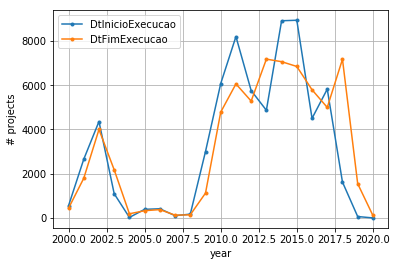

In [79]:
plt.plot(xyb.x, xyb.y, '.-')
plt.plot(xye.x, xye.y, '.-')
plt.legend([xyb.col, xye.col])
plt.grid(True)
plt.xlabel('year')
plt.ylabel('# projects')
plt.figsize([80, 100])
plt.show()
# plt.axis([begin, end, 0, 10000])

# begin,end = 2013,2020
# print('Year of the oldest project: %d' % xyb.x[0])
# print('Year of the newest project: %d' % xye.x[-1])
# projects_in_range = sum([xyb.y[i] for i in range(len(xyb.x)) if xyb.x[i] >= begin and xyb.x[i] <= end])
# print('Number of projects in range [%d, %d]: %d' % (begin, end, projects_in_range))
# print('Number of projects out of range [%d, %d]: %d' % (begin, end, sum(xyb.y) - projects_in_range))

In [12]:
def measures_1dt(df, col='DtInicioExecucao'):
    ''' Print some measures about a specific datetime column in a Pandas Dataframe.
        args:
            df   - Dataframe to be analyzed
            col - datetime column name
    '''
    print('col:   %s' % col)
    col = df[col]
    has_col = (col != 'nan')
    print('Total: %d' % len(df))
    print('col:   %d' % len(df[has_col]))

col = 'DtInicioExecucao'
df = projects[[col]]
measures_1dt(df)

col:   DtInicioExecucao
Total: 210684
col:   75255


---
### Diligences

In [4]:
diligences = pd.read_csv(DATA_FOLDER + 'tb_diligencia.csv')
diligences.head()

/home/duerno/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,Solicitacao,idSolicitante,DtResposta,Resposta,idProponente,stEstado,idPlanoDistribuicao,idArquivo,idCodigoDocumentosExigidos,idProduto,stProrrogacao,stEnviado
0,1,115502,124,2009-09-24 16:52:23,"<p class=""MsoNormal"" style=""margin: 0cm 0cm 0p...",2851,2010-01-18 14:39:07,O PROPONENTE NÃO RESPONDEU A DILIGÊNCIA NO PRA...,NaN,0,NaN,NaN,NaN,NaN,NaN,S
1,2,114250,124,2009-09-24 18:11:00,"<p class=""MsoNormal"" style=""margin: 0cm 0cm 0p...",2825,2009-10-07 19:45:18,"<p style=""text-align: justify;"">1) Readequa&cc...",6010.0,0,NaN,NaN,NaN,NaN,NaN,S
2,3,115134,124,2009-09-24 18:13:00,"<p class=""MsoNormal"" style=""margin: 0cm 0cm 0p...",2825,2009-10-07 16:10:21,"<p>Ronaldo, boa tarde...</p>\r\n<p>segue abaix...",9553.0,0,NaN,NaN,NaN,NaN,NaN,S
3,4,114399,124,2009-09-24 18:26:00,"<p class=""MsoNormal"" style=""margin: 0cm 0cm 0p...",2845,2009-10-06 09:30:35,"<p class=""MsoNormal"" style=""MARGIN: 0cm 0cm 0p...",9521.0,1,NaN,NaN,NaN,NaN,NaN,S
4,5,115059,124,2009-09-24 18:35:00,"<p class=""MsoNormal"" style=""margin: 0cm 0cm 0p...",2915,2009-10-02 18:01:47,<p>&nbsp;</p>\r\n<p>Ao Pronac/Funarte (LL)</p>...,11598.0,1,NaN,NaN,NaN,NaN,NaN,S


---
### Relation: Project x Diligence

In [5]:
proj_dil = pd.read_csv(DATA_FOLDER + 'dt_tb_planilha_projeto_2013.csv')
proj_dil.head()

,Unnamed: 0,idPRONAC,Situacao,DtProtocolo
0,0,111109,E36,2009-01-22 15:29:39
1,1,111109,E36,2009-01-22 15:29:39
2,2,111109,E36,2009-01-22 15:29:39
3,3,111109,E36,2009-01-22 15:29:39
4,4,111109,E36,2009-01-22 15:29:39
